In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
file_path = r"C:\Users\isabela.ribeiro\Desktop\cybersecurity_attacks.csv"

In [5]:
df = pd.read_csv(file_path)

In [ ]:
df

In [ ]:
df.describe()

In [ ]:
print(df.shape)

In [ ]:
print(df.info())

In [ ]:
print(df.nunique())

In [9]:
#distribuição de variavel alvo
print(df['Attack Type'].value_counts(normalize=True)*100)

Attack Type
DDoS         33.5700
Malware      33.2675
Intrusion    33.1625
Name: proportion, dtype: float64


In [10]:
#valores ausentes por coluna
print(df.isnull().sum())

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64


In [11]:
#verificar se existe valores negativos
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

In [12]:
for col in numeric_cols:
    if (df[col]<0).any():
        print(f"Coluna {col} tem valores negativos")
    else:
        print(f"Coluna {col} - sem valores negativos")

Coluna Source Port - sem valores negativos
Coluna Destination Port - sem valores negativos
Coluna Packet Length - sem valores negativos
Coluna Anomaly Scores - sem valores negativos


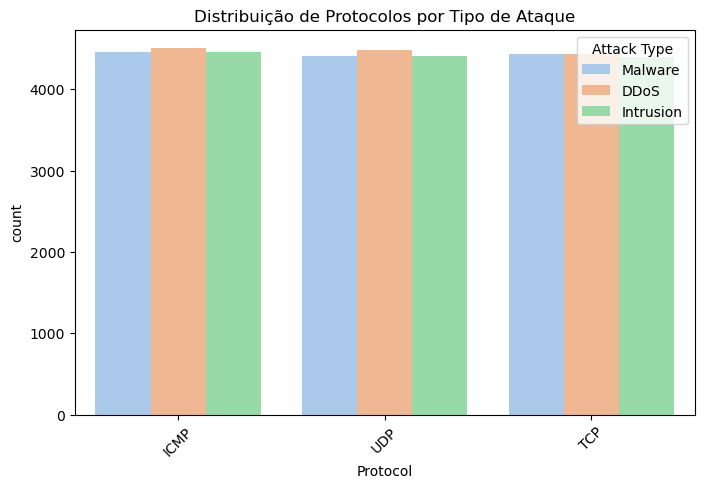

In [13]:
# Ver a relação entre protocolo e tipo de ataque
plt.figure(figsize=(8,5))
sns.countplot(x=df['Protocol'], hue=df['Attack Type'], palette="pastel")
plt.title("Distribuição de Protocolos por Tipo de Ataque")
plt.xticks(rotation=45)
plt.show()

C:\Users\isabela.ribeiro\AppData\Local\Temp\ipykernel_6172\933075370.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Attack Type'], palette="viridis")


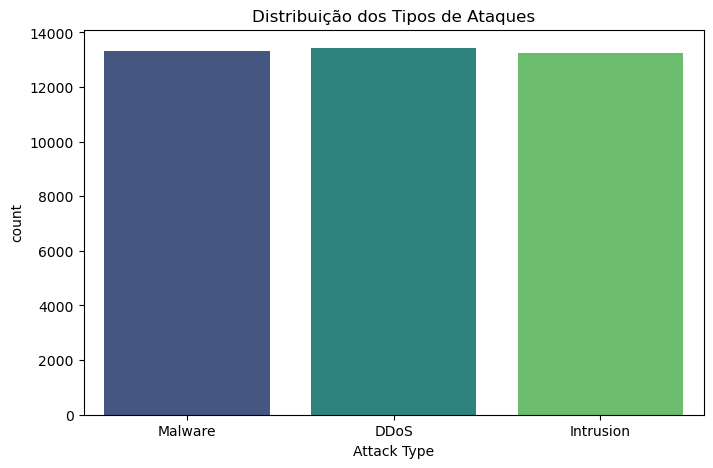

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Attack Type'], palette="viridis")
plt.title("Distribuição dos Tipos de Ataques")
plt.show()

C:\Users\isabela.ribeiro\AppData\Local\Temp\ipykernel_6172\2900084270.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Attack Type'], y=df['Packet Length'], palette="coolwarm")


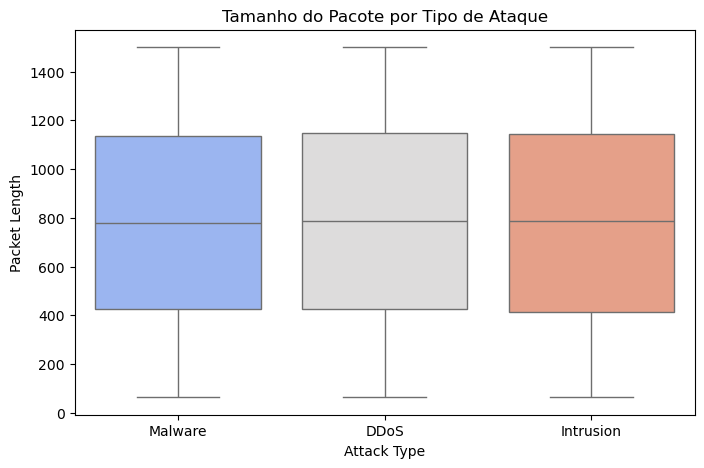

In [15]:
# Ver como o tamanho dos pacotes varia entre os tipos de ataque
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Attack Type'], y=df['Packet Length'], palette="coolwarm")
plt.title("Tamanho do Pacote por Tipo de Ataque")
plt.show()

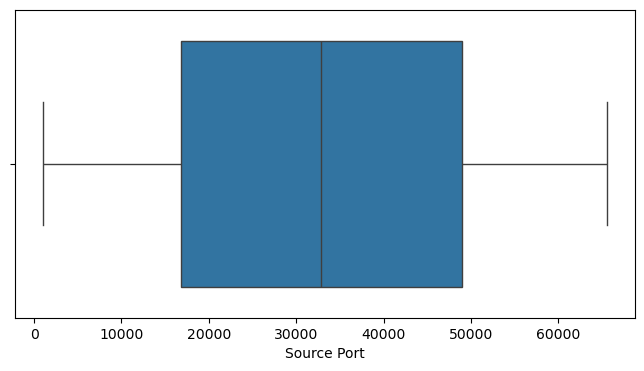

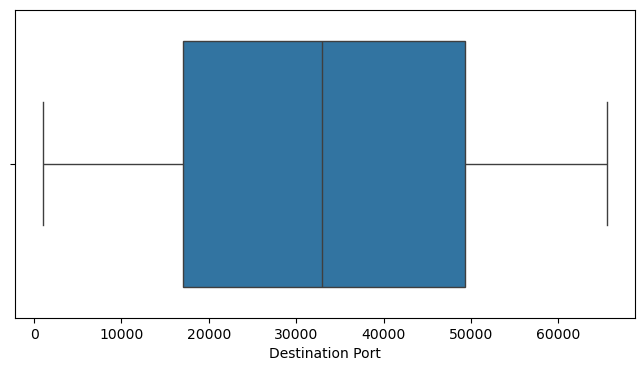

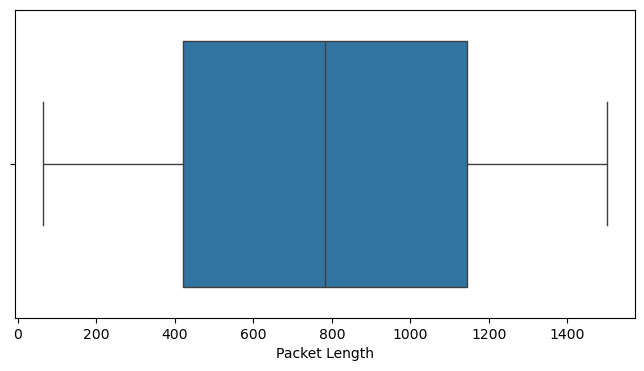

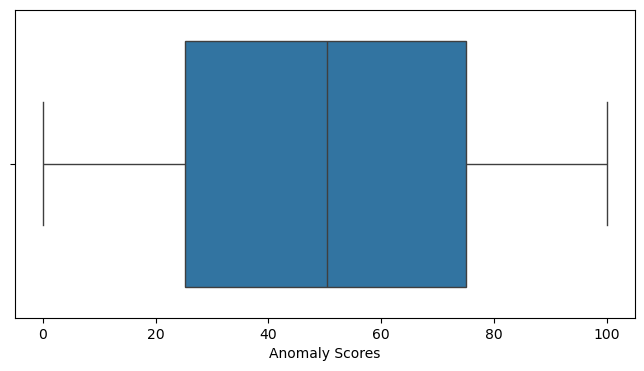

In [16]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.show()


In [17]:
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

NameError: name 'Q1' is not defined

In [ ]:
for col in numeric_cols:
    print(f"Valores extremos da coluna {col}:")
    print("Mínimo:", df[col].min())
    print("Máximo:", df[col].max())
    print("-----------")

In [23]:
# Criar um dicionário para armazenar os outliers detectados
outliers_dict = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)  # Primeiro quartil (25%)
    Q3 = df[col].quantile(0.75)  # Terceiro quartil (75%)
    IQR = Q3 - Q1  # Intervalo interquartil
    
    # Definir limites para outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar os valores que estão fora desses limites
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    if not outliers.empty:
        outliers_dict[col] = len(outliers)
        print(f"Coluna {col} tem {len(outliers)} outliers.")

# Exibir colunas com outliers
print(outliers_dict)

{}


In [ ]:
# Supondo que df seja seu DataFrame e a coluna Timestamp seja do tipo string
df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Convertendo para datetime
 
# Criando a nova coluna de intervalo hora a hora
df['Hour Range'] = df['Timestamp'].dt.hour  # Extraindo a hora
 
# Criando a faixa de hora a hora, combinando as horas em intervalos de 1 hora
df['Hour Range'] = df['Hour Range'].apply(lambda x: f'{x}-{x+1}' if x < 23 else '23-24')


C:\Users\isabela.ribeiro\AppData\Local\Temp\ipykernel_6172\2562596582.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Attack Type", y="Packet Length", data=df, palette="pastel")


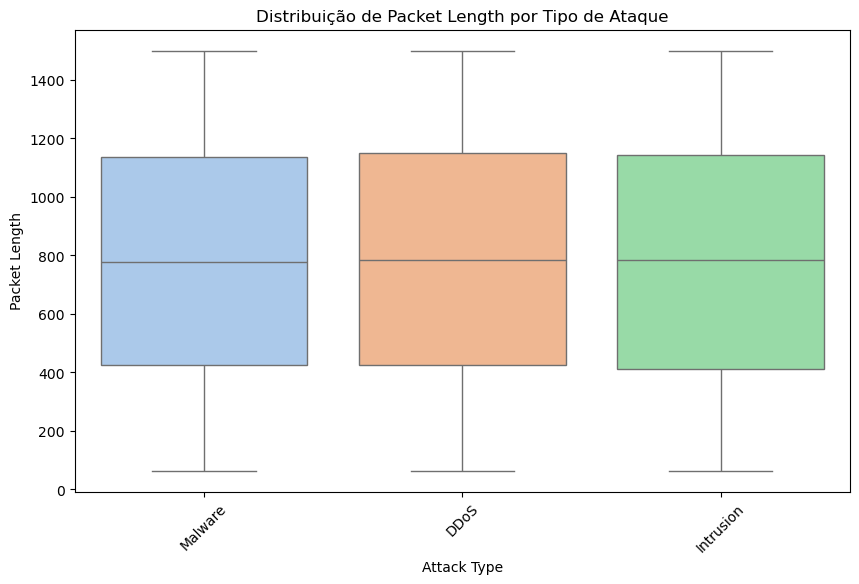

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Attack Type", y="Packet Length", data=df, palette="pastel")
plt.xticks(rotation=45)
plt.title("Distribuição de Packet Length por Tipo de Ataque")
plt.show()

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

ValueError: could not convert string to float: '2023-05-30 06:33:58'

<Figure size 1000x1000 with 0 Axes>

In [29]:
unique_values = df['Attack Type'].unique()
print(unique_values)

['Malware' 'DDoS' 'Intrusion']


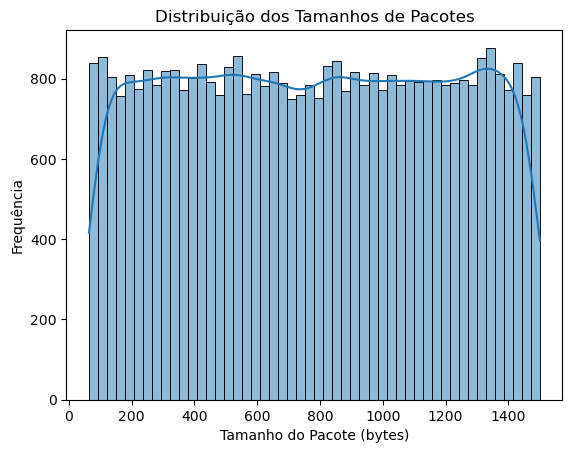

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Packet Length'], bins=50, kde=True)
plt.title("Distribuição dos Tamanhos de Pacotes")
plt.xlabel("Tamanho do Pacote (bytes)")
plt.ylabel("Frequência")
plt.show()

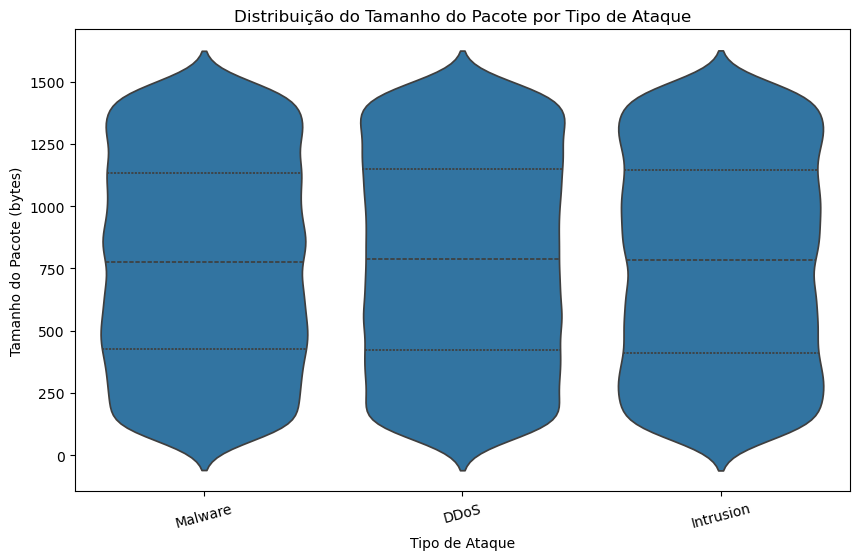

In [33]:
#compare size with attack type
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.violinplot(x=df['Attack Type'], y=df['Packet Length'], inner="quartile")
plt.title("Distribuição do Tamanho do Pacote por Tipo de Ataque")
plt.xlabel("Tipo de Ataque")
plt.ylabel("Tamanho do Pacote (bytes)")
plt.xticks(rotation=15)
plt.show()


In [47]:
# Agrupar por tipo de ataque e calcular estatísticas
attack_stats = df.groupby('Attack Type')['Packet Length'].agg(['mean', 'min', 'max'])

# Exibir resultado
print(attack_stats.round(2))


               mean  min   max
Attack Type                   
DDoS         785.35   64  1500
Intrusion    780.92   64  1500
Malware      778.05   64  1500


In [49]:
#Resumo estatístico
print(df.groupby('Attack Type')['Packet Length'].describe().round(2))

               count    mean     std   min    25%    50%     75%     max
Attack Type                                                             
DDoS         13428.0  785.35  416.69  64.0  424.0  786.0  1150.0  1500.0
Intrusion    13265.0  780.92  418.21  64.0  412.0  785.0  1145.0  1500.0
Malware      13307.0  778.05  413.22  64.0  426.0  777.0  1135.0  1500.0


In [61]:
# Pequeno → Pacotes menores que 420 bytes (1º quartil).
# Médio → Pacotes entre 420 e 1143 bytes (2º e 3º quartil).
# Grande → Pacotes maiores que 1143 bytes (acima do 3º quartil).

def classificar_pacote(Size):
    if Size < 426:
        return "Small"
    elif 426 <= Size <= 1135:
        return "Medium"
    else:
        return "Large"

df['Packet Size Category'] = df['Packet Length'].apply(classificar_pacote)

# Contagem de cada categoria
print(df['Packet Size Category'].value_counts())


Packet Size Category
Medium    19658
Large     10201
Small     10141
Name: count, dtype: int64


In [63]:
print(df.columns)

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source',
       'Packet Size Category'],
      dtype='object')


In [67]:
unique_values_ = df['Traffic Type'].unique()
print(unique_values_)

['HTTP' 'DNS' 'FTP']


In [93]:
# Garantir que a coluna 'timestamp' esteja no formato datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extrair o ano, mês, dia e hora da coluna 'timestamp'
df['year'] = df['Timestamp'].dt.year
df['month'] = df['Timestamp'].dt.month
df['day'] = df['Timestamp'].dt.day
df['time'] = df['Timestamp'].dt.strftime('%H:%M:%S')  # Formato de hora (HH:MM:SS)

# Exibir o DataFrame resultante
print(df['year'], df['month'], df['day'],df['time'])


0        2023
1        2020
2        2022
3        2023
4        2023
         ... 
39995    2023
39996    2023
39997    2022
39998    2023
39999    2023
Name: year, Length: 40000, dtype: int32 0         5
1         8
2        11
3         7
4         7
         ..
39995     5
39996     3
39997     3
39998     9
39999    10
Name: month, Length: 40000, dtype: int32 0        30
1        26
2        13
3         2
4        16
         ..
39995    26
39996    27
39997    31
39998    22
39999    10
Name: day, Length: 40000, dtype: int32 0        06:33:58
1        07:08:30
2        08:23:25
3        10:38:46
4        13:11:07
           ...   
39995    14:08:42
39996    00:38:27
39997    01:45:49
39998    18:32:38
39999    11:59:52
Name: time, Length: 40000, dtype: object


In [39]:
print(df['Destination Port'].describe())

count    40000.000000
mean     33150.868650
std      18574.668842
min       1024.000000
25%      17094.750000
50%      33004.500000
75%      49287.000000
max      65535.000000
Name: Destination Port, dtype: float64


GOAL: GENERATE ALL POSSIBLE COMBINATIONS BETWEEN VARIABLES

In [11]:
import itertools
import pandas as pd

In [29]:
# Carregar o dataset corretamente
file_path = r"C:\Users\isabela.ribeiro\Desktop\cybersecurity_attacks.csv"
df = pd.read_csv(file_path)

# Criando colunas booleanas
df["Firewall Logs Status"] = df["Firewall Logs"].apply(lambda x: True if x == "Log Data" else False)
df["IDS/IPS Alerts Status"] = df["IDS/IPS Alerts"].apply(lambda x: True if x == "Alert Data" else False)
df["Malware Indicators Status"] = df["Malware Indicators"].apply(lambda x: True if x == "IoC Detected" else False)
df["Alerts/Warnings Status"] = df["Alerts/Warnings"].apply(lambda x: True if x == "Alert Triggered" else False)
df["Proxy Status"] = df["Proxy Information"].apply(lambda x: True if x == "Hidden" else False)

# Criando colunas de range - usando df e não cybersecurity_attacks
df['_Destination_Port_Range'] = df['Destination Port'].apply(
     lambda value: "< 1.000" if value < 1000 else 
                   "1.000 to 5.000" if 1000 <= value < 5000 else 
                   "5.000 to 10.000" if 5000 <= value < 10000 else 
                   "10.000 to 20.000" if 10000 <= value < 20000 else 
                   "20.000 to 30.000" if 20000 <= value < 30000 else 
                   "30.000 to 40.000" if 30000 <= value < 40000 else 
                   "40.000 to 50.000" if 40000 <= value < 50000 else 
                   "50.000 to 60.000" if 50000 <= value < 60000 else 
                   "60.000 to 70.000" if 60000 <= value <= 70000 else 
                   "Above 70.000"
 )

df['_Source_Port_Range'] = df['Source Port'].apply(
     lambda value: "< 1.000" if value < 1000 else 
                   "1.000 to 5.000" if 1000 <= value < 5000 else 
                   "5.000 to 10.000" if 5000 <= value < 10000 else 
                   "10.000 to 20.000" if 10000 <= value < 20000 else 
                   "20.000 to 30.000" if 20000 <= value < 30000 else 
                   "30.000 to 40.000" if 30000 <= value < 40000 else 
                   "40.000 to 50.000" if 40000 <= value < 50000 else 
                   "50.000 to 60.000" if 50000 <= value < 60000 else 
                   "60.000 to 70.000" if 60000 <= value <= 70000 else 
                   "Above 70.000"
 )

## SHOULD I DO LESS RANGES BASED ON STATISTICS?

df['_Packet_Length_Range'] = df['Packet Length'].apply(
    lambda value: "Small" if value <= 420 else 
                  "Medium" if value <= 782 else 
                  "Large" if value <= 1143 else 
                  "Very Large"
)
# "Small (≤ 420)" if value <= 420 else 
# "Medium (421 - 782)" if value <= 782 else 
# "Large (783 - 1143)" if value <= 1143 else 
# "Very Large (1144 - 1500)"
  ## BASED IN: 
# df['Packet Length'].describe()
# mean       781.452725 
# std        416.044192
# min         64.000000
# 25%        420.000000
# 50%        782.000000
# 75%       1143.000000
# max       1500.000000

df["Anomaly_Score_Range"] = df["Anomaly Scores"].apply(
    lambda x: "Low" if x <= 25.15 else
              "Medium" if x <= 50.34 else
              "High" if x <= 75.03 else
              "Critical"
)

# "Low (0-25)" if x <= 25.15 else
# "Medium (25-50)" if x <= 50.34 else
# "High (50-75)" if x <= 75.03 else
# "Critical (75-100)"
  ## BASED IN:
# df['Anomaly Scores'].describe()
# count    40000.000000
# mean        50.113473
# std         28.853598
# min          0.000000
# 25%         25.150000
# 50%         50.345000
# 75%         75.030000
# max        100.000000

# Verificando se as colunas foram criadas corretamente
df

## print(cybersecurity_attacks)

## PENSAR EM COMO DEIXAR ISSO MAIS DINAMICO, DEPOIS!
## Need to be together or it will not save

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Log Source,Firewall Logs Status,IDS/IPS Alerts Status,Malware Indicators Status,Alerts/Warnings Status,Proxy Status,_Destination_Port_Range,_Source_Port_Range,_Packet_Length_Range,Anomaly_Score_Range
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Server,True,False,True,False,False,10.000 to 20.000,30.000 to 40.000,Medium,Medium
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Firewall,True,False,True,False,False,40.000 to 50.000,10.000 to 20.000,Very Large,High
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Firewall,True,True,True,True,False,50.000 to 60.000,10.000 to 20.000,Small,Critical
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Firewall,False,True,False,True,False,30.000 to 40.000,20.000 to 30.000,Small,Low
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Firewall,False,True,False,True,False,20.000 to 30.000,5.000 to 10.000,Very Large,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:42,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,Quibusdam ullam consequatur consequuntur accus...,...,Firewall,True,True,True,False,False,5.000 to 10.000,30.000 to 40.000,Very Large,Medium
39996,2023-03-27 00:38:27,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,Quaerat neque esse. Animi expedita natus commo...,...,Firewall,True,False,True,False,False,20.000 to 30.000,1.000 to 5.000,Very Large,Medium
39997,2022-03-31 01:45:49,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,Enim at aspernatur illum. Saepe numquam eligen...,...,Server,True,True,True,False,False,20.000 to 30.000,20.000 to 30.000,Large,Medium
39998,2023-09-22 18:32:38,208.72.233.205,173.79.112.252,20013,2703,UDP,483,Data,FTP,Officiis dolorem sed harum provident earum dis...,...,Server,True,False,True,True,False,1.000 to 5.000,20.000 to 30.000,Medium,Critical


In [23]:
import uuid

df['ID'] = [uuid.uuid4() for _ in range(len(df))]

df

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,IDS/IPS Alerts,Log Source,Firewall Logs Status,IDS/IPS Alerts Status,Malware Indicators Status,Alerts/Warnings Status,Proxy Status,_Packet_Length_Range,Anomaly_Score_Range,ID
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,NaN,Server,True,False,True,False,False,Medium,Medium,f502ff47-a120-4871-9f4f-03972575e5c9
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,NaN,Firewall,True,False,True,False,False,Very Large,High,fb7eb7b3-2f69-4c86-a63c-baae878f7dcc
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Alert Data,Firewall,True,True,True,True,False,Small,Critical,79331871-0596-489f-b103-4a8cd1e2bef9
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Alert Data,Firewall,False,True,False,True,False,Small,Low,6b877540-8bb0-4d58-83a4-a404d06fdde9
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Alert Data,Firewall,False,True,False,True,False,Very Large,Low,14cf7ccc-e37c-4a95-a582-f9e4e04ffa74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:42,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,Quibusdam ullam consequatur consequuntur accus...,...,Alert Data,Firewall,True,True,True,False,False,Very Large,Medium,f0c5555b-f1e4-443d-b898-54df3ba47596
39996,2023-03-27 00:38:27,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,Quaerat neque esse. Animi expedita natus commo...,...,NaN,Firewall,True,False,True,False,False,Very Large,Medium,5d29d58d-74a6-4861-8ef1-cb81d6f2d075
39997,2022-03-31 01:45:49,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,Enim at aspernatur illum. Saepe numquam eligen...,...,Alert Data,Server,True,True,True,False,False,Large,Medium,a17dcc31-a2fb-4bc2-aca5-b2989a1a21f7
39998,2023-09-22 18:32:38,208.72.233.205,173.79.112.252,20013,2703,UDP,483,Data,FTP,Officiis dolorem sed harum provident earum dis...,...,NaN,Server,True,False,True,True,False,Medium,Critical,c59e69ce-8280-4747-8a2a-9438659d210c


In [ ]:
# save old one too (if run again)
# save a new table only with new columns and id

columns_to_save = [
    "ID",
    "Firewall Logs Status",
    "IDS/IPS Alerts Status",
    "Malware Indicators Status",
    "Alerts/Warnings Status",
    "Proxy Status",
    "_Packet_Length_Range",
    "_Source_Port_Range",
    "_Destination_Port_Range",
    "Anomaly_Score_Range",
    "Attack Type"
]

# Criar um novo dataframe apenas com as colunas desejadas
df_filtered = df[columns_to_save]

# Caminho para salvar o arquivo (altere conforme necessário)
output_path = r"C:\Users\isabela.ribeiro\Desktop\cybersecurity_filtered.csv"

# Salvar em CSV
df_filtered.to_csv(output_path, index=False)

print(f"Arquivo salvo com sucesso em: {output_path}")


In [25]:
# Gerando todas as combinações possíveis com os novos nomes das colunas
combinations = list(itertools.product(
        df["Anomaly_Score_Range"], 
        df["Attack Type"] 
))

# Exibir algumas combinações para ver se funcionou
print(combinations[:5])  # Exibir as 5 primeiras combinações

MemoryError: 

In [19]:
# Gerando todas as combinações possíveis com os novos nomes das colunas
combinations = list(itertools.product(
        df["Firewall Logs Status"], 
        df["IDS/IPS Alerts Status"], 
        df["Malware Indicators Status"], 
        df["Alerts/Warnings Status"], 
        df["Proxy Status"], 
        df["_Packet_Length_Range"],  
        # df["_Source_Port_Range"],
        # df["_Destination_Port_Range"], 
        # df["Anomaly_Score_Range"], 
        # df["Attack Type"] 
))

# Exibir algumas combinações para ver se funcionou
print(combinations[:5])  # Exibir as 5 primeiras combinações

## and if i put it in MariaDB and use sql to run it or even use script but reading from there to skip the limitation from jupyter and the local pc

MemoryError: 

In [ ]:
# Criando um DataFrame com todas as associações
df_combinations = 
    pd.DataFrame(combinations, 
                     columns=[
                         "Firewall", 
                         "IDS/IPS", 
                         "IoC Detected", 
                         "Alert/Warning", 
                         "Proxy Hidden",
                         "Packet Length Range", 
                         "Source Port Range", 
                         "Destination Port Range", 
                         "Anomaly Score Range", 
                         "Attack Type"
                    ]
                )

In [ ]:
# Exibir as primeiras linhas para verificar
print(df_combinations.head())

# Exibindo o DataFrame com as combinações
df_combinations.head()

In [ ]:
# Salvar para CSV (caso queira visualizar no Excel)
df_combinations.to_csv("cybersecurity_combinations.csv", index=False)